# LISTA 1 - SME0130 Complex Networks

Alunas: 

Giovanna Zolin Pinheiro Hayasida - n: 9762848 

Luna Wagner Cunha - n: 9762831

## Exercício 1


In [2]:
# Imports

import networkx as nx 
import matplotlib.pyplot as plt
from numpy  import *
import numpy as np
from scipy.linalg import expm
from scipy.sparse import csr_matrix, issparse
from scipy import stats
import collections

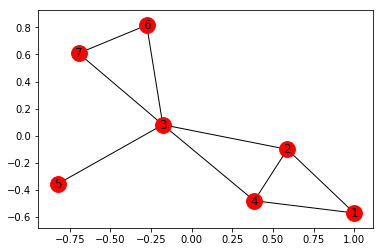

In [3]:
# Constriundo o grafo
G1 = nx.Graph()
elist = [(1,2),(1,4),(2,4),(2,3),(3,4),(3,6),(3,7),(3,5),(6,7)]
G1.add_edges_from(elist)
pos=nx.spring_layout(G1)
nx.draw_networkx(G1, with_labels = True, node_size=250, font_size=12, pos=pos)
plt.show(True)

#### A - Degree Distribution

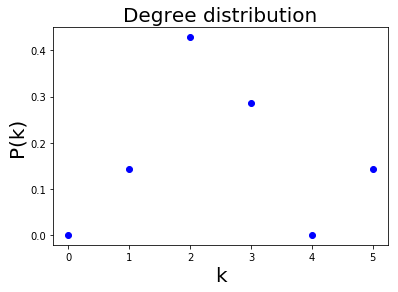

In [4]:
def degree_distribution(G1):
    vk = dict(G1.degree())
    vk = list(vk.values())  
    vk = np.array(vk)
    maxk = np.max(vk)
    mink = np.min(vk)
    kvalues= arange(0,maxk+1) 
    Pk = np.zeros(maxk+1) 
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) 
    return kvalues,Pk

ks, Pk = degree_distribution(G1)

fig = plt.subplot(1,1,1)
plt.plot(ks,Pk,'bo')
plt.xlabel("k", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.title("Degree distribution", fontsize=20)
plt.show(True)

#### B - Local clustering coefficient

In [6]:
nx.clustering(G1)

{1: 1.0,
 2: 0.6666666666666666,
 4: 0.6666666666666666,
 3: 0.2,
 6: 1.0,
 7: 1.0,
 5: 0}

#### C - Transitivity

In [60]:
CC = (nx.transitivity(G1)) 
print("Transitivity = ","%3.4f"%CC)

Transitivity =  0.4737


#### D- Distance matrix  


In [61]:
d = nx.diameter(G1)
print('Network diameter:', d)

Network diameter: 3


In [62]:
G1.nodes()

NodeView((1, 2, 4, 3, 6, 7, 5))

In [63]:
# Distribution of the geodesic distances
N = len(G1)
if nx.is_connected(G1) == True:
    D = zeros(shape=(N,N)) # D é a matriz de distâncias
    vl = []
    for i in arange(1,N+1):
        for j in arange(i+1, N+1):
            if(i != j):
                aux = nx.shortest_path(G1,i,j)
                dij = len(aux)-1
                D[i-1][j-1] = dij
                D[j-1][i-1] = dij
                vl.append(dij)
D

array([[0., 1., 2., 1., 3., 3., 3.],
       [1., 0., 1., 1., 2., 2., 2.],
       [2., 1., 0., 1., 1., 1., 1.],
       [1., 1., 1., 0., 2., 2., 2.],
       [3., 2., 1., 2., 0., 2., 2.],
       [3., 2., 1., 2., 2., 0., 1.],
       [3., 2., 1., 2., 2., 1., 0.]])

#### E- Entropy of the degree distribution

In [10]:
from numpy  import *
import numpy as np
def shannon_entropy(G):
    k,Pk = degree_distribution(G)
    H = 0
    for p in Pk:
        if(p > 0):
            H = H - p*math.log(p, 2)
    return H

H = shannon_entropy(G1)
print("Shannon Entropy = ", "%3.4f"%H)

Shannon Entropy =  1.8424


#### F-Second moment of the degree distribution.


In [64]:
def momment_of_degree_distribution(G,m):
    k,Pk = degree_distribution(G)
    M = sum((k**m)*Pk)
    return M
k2 = momment_of_degree_distribution(G1,2)
print("Second moment of the degree distribution = ", k2)

Second moment of the degree distribution =  7.999999999999999


## Exercício 2

#### Les miserables


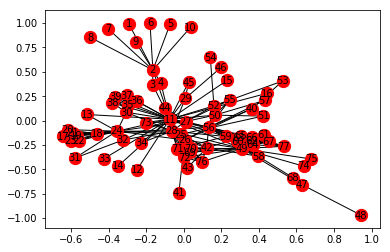

In [6]:
#Direcionado e com pesos
G= nx.read_edgelist("lesmis.txt", nodetype=int, data=(('weight',float),)) 
pos=nx.spring_layout(G)
nx.draw_networkx(G, with_labels = True, node_size=150, font_size=10, pos=pos)
plt.show(True)

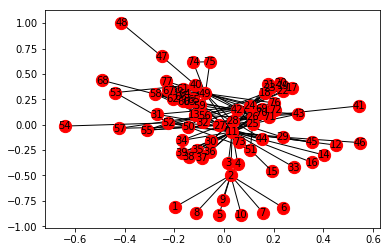

In [7]:
#Não direcionado
G1 = G.to_undirected()
pos=nx.spring_layout(G1)
nx.draw_networkx(G1, with_labels = True, node_size=150, font_size=10, pos=pos)
plt.show(True)

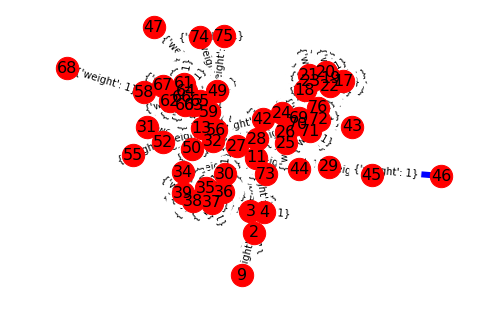

In [8]:
#Tirando os pesos
min_weight = 1.0
Gles = nx.Graph()
for (u,v,w) in G.edges(data=True):
    if w['weight'] > min_weight :
        Gles.add_edge(u, v, weight=1)
labels = Gles.nodes()

nx.draw(Gles, with_labels = True, nodecolor='r', edge_color='b', 
        node_size=500, font_size=16, pos=pos, width=6)   
nx.draw_networkx_edge_labels(Gles,pos)
plt.show(True)


#### Florida


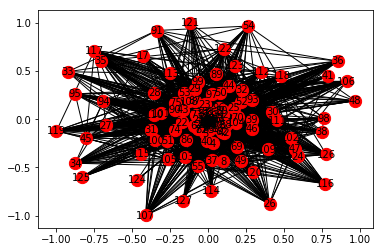

In [9]:
#Direcionado e com pesos
G= nx.read_edgelist("florida2.txt", nodetype=int, data=(('weight',float),)) 
pos=nx.spring_layout(G)
nx.draw_networkx(G, with_labels = True, node_size=150, font_size=10, pos=pos)
plt.show(True)

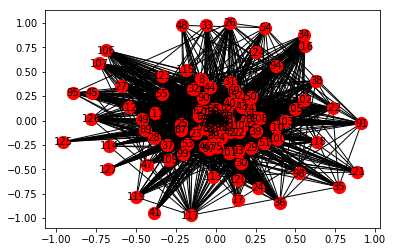

In [10]:
#Não direcionado
G1 = G.to_undirected()
pos=nx.spring_layout(G1)
nx.draw_networkx(G1, with_labels = True, node_size=150, font_size=10, pos=pos)
plt.show(True)

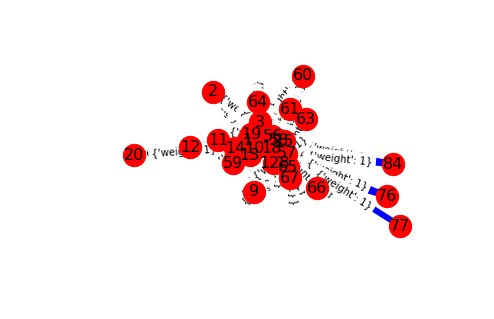

In [11]:
#Tirando os pesos
min_weight = 1.0
Gnew = nx.Graph()
for (u,v,w) in G.edges(data=True):
    if w['weight'] > min_weight :
        Gnew.add_edge(u, v, weight=1)
labels = Gnew.nodes()
nx.draw(Gnew, with_labels = True, nodecolor='r', edge_color='b', 
        node_size=500, font_size=16, pos=pos, width=6)   
nx.draw_networkx_edge_labels(Gnew,pos)
plt.show(True)

## Exercício 3

PageRank:  {1: 0.06650408854310437, 2: 0.015584471452016947, 3: 0.04825336297195517, 9: 0.02672293764174387, 10: 0.031686910191964554, 11: 0.025590170469519995, 12: 0.031686910191964554, 13: 0.015622384358999541, 14: 0.031686910191964554, 15: 0.03243633286161803, 18: 0.06331414994233385, 19: 0.04776497670531365, 58: 0.059861271748978886, 59: 0.03073252382919342, 60: 0.02080931041456511, 61: 0.02583995586785113, 63: 0.02583995586785113, 64: 0.02583995586785113, 65: 0.03264860362140135, 67: 0.03264860362140135, 128: 0.07839695336801977, 20: 0.02151670358800195, 84: 0.01610825247049698, 57: 0.09242074507629093, 56: 0.04734793157348112, 66: 0.02682095064379321, 76: 0.01572039736104888, 77: 0.010594279557274842}


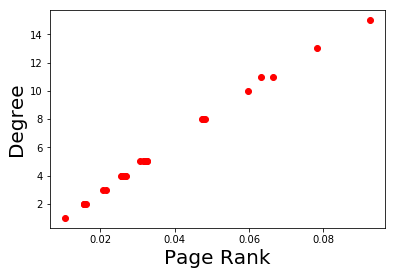

In [12]:
# Page-rank aplicado a rede Les Miserables sem pesos 
PR = dict(nx.pagerank(Gnew, alpha=0.85))
print("PageRank: ", PR)

PR = dict(nx.pagerank(Gnew, alpha=0.85))
PR = list(PR.values())
PR = np.array(PR)

vk = dict(Gnew.degree())
vk = list(vk.values())
vk = np.array(vk)

plt.figure(figsize=(6,4))
plt.ylabel("Degree", fontsize = 20)
plt.xlabel("Page Rank", fontsize = 20)
plt.plot(PR, vk, 'ro')
plt.show(True)

Sim, os graus dos nós são positivamente correlacionados com o número de vezes que  o nó é visitado.

## Exercício 4

#### A) 

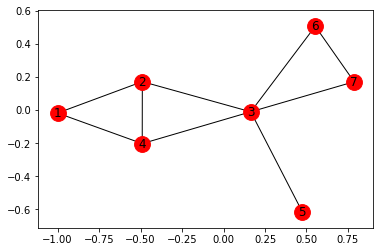

In [13]:
# Construindo a rede
G1 = nx.Graph()
elist = [(1,2),(1,4),(2,4),(2,3),(3,4),(3,6),(3,7),(3,5),(6,7)]
G1.add_edges_from(elist)
pos=nx.spring_layout(G1)
nx.draw_networkx(G1, with_labels = True, node_size=250, font_size=12, pos=pos)
plt.show(True)

In [14]:
N = len(G1)

vk = dict(G1.degree())
vk = list(vk.values())
A = nx.adjacency_matrix(G1)
P = np.zeros((N,N), dtype = 'float')
for i in np.arange(0,N):
    for j in np.arange(0,N):
        P[i,j] = A[i,j]/vk[i]
        P[i,j] = round(P[i,j], 4)
        
P = csr_matrix(P)
P = P.todense()
A = A.todense()

In [15]:
# Elevando a matriz a 100
np.linalg.matrix_power(P, 100).round(5)

array([[0.11072, 0.16609, 0.16609, 0.27684, 0.11074, 0.11074, 0.05537],
       [0.11072, 0.16609, 0.16609, 0.27683, 0.11074, 0.11074, 0.05537],
       [0.11072, 0.16609, 0.16609, 0.27683, 0.11074, 0.11074, 0.05537],
       [0.11073, 0.16611, 0.16611, 0.27687, 0.11076, 0.11076, 0.05538],
       [0.11074, 0.16612, 0.16612, 0.27689, 0.11076, 0.11076, 0.05538],
       [0.11074, 0.16612, 0.16612, 0.27689, 0.11076, 0.11076, 0.05538],
       [0.11074, 0.16612, 0.16612, 0.27688, 0.11076, 0.11076, 0.05538]])

In [16]:
# Elevando a matriz a 100000
np.linalg.matrix_power(P, 100000).round(5)

array([[0.00396, 0.00595, 0.00595, 0.00991, 0.00396, 0.00396, 0.00198],
       [0.00396, 0.00595, 0.00595, 0.00991, 0.00396, 0.00396, 0.00198],
       [0.00396, 0.00595, 0.00595, 0.00991, 0.00396, 0.00396, 0.00198],
       [0.00396, 0.00595, 0.00595, 0.00991, 0.00396, 0.00396, 0.00198],
       [0.00396, 0.00595, 0.00595, 0.00991, 0.00396, 0.00396, 0.00198],
       [0.00396, 0.00595, 0.00595, 0.00991, 0.00396, 0.00396, 0.00198],
       [0.00396, 0.00595, 0.00595, 0.00991, 0.00396, 0.00396, 0.00198]])

Os valores das colunas tendem a ficar iguais quando n vai para o infinito

#### B)

In [17]:
Gles_mis= nx.read_edgelist("lesmis.txt", nodetype=int, data=(('weight',float),)) 

In [18]:
G = nx.convert_node_labels_to_integers(Gles_mis)
A = nx.adjacency_matrix(G).todense()
A3 = np.linalg.matrix_power(A,3)
N = len(G)

In [19]:
d = nx.diameter(G)
if nx.is_connected(G) == True:
    D = zeros(shape=(N,N))
    vl = []
    for i in arange(0,N):
        for j in arange(i+1, N):
            if(i != j):
                aux = nx.shortest_path(G,i,j)
                dij = len(aux)-1
                D[i][j] = dij
                D[j][i] = dij
                vl.append(dij)
    x = range(0,d+1)

else:
    print("The graph has more than one connected component")
D

array([[0., 1., 2., ..., 4., 4., 5.],
       [1., 0., 1., ..., 3., 3., 4.],
       [2., 1., 0., ..., 3., 3., 4.],
       ...,
       [4., 3., 3., ..., 0., 3., 3.],
       [4., 3., 3., ..., 3., 0., 4.],
       [5., 4., 4., ..., 3., 4., 0.]])

Text(0.5, 1.0, 'D vs A3')

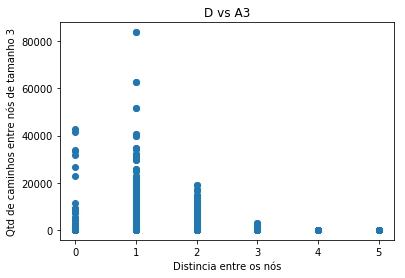

In [20]:
D_list = []
for i in np.arange(0,N):
    for j in np.arange(0,N):
        D_list.append(D[i,j])
        
A3_list = []
for i in np.arange(0,N):
    for j in np.arange(0,N):
        A3_list.append(A3[i,j])
plt.scatter(D_list, A3_list)
plt.xlabel("Distincia entre os nós")
plt.ylabel("Qtd de caminhos entre nós de tamanho 3")

plt.title("D vs A3")


#### C) 

In [21]:
def matrix_P(G,n):
    N = len(G)
    vk = dict(G.degree())
    vk = list(vk.values())
    A = nx.adjacency_matrix(G)
    P = np.zeros((N,N), dtype = 'float')
    for i in np.arange(0,N):
        for j in np.arange(0,N):
            P[i,j] = A[i,j]/vk[i]
            P[i,j] = round(P[i,j], 4)
            
    P_n = np.linalg.matrix_power(P,n).round(5)
    
    P_list = []
    for i in np.arange(0,N):
        for j in np.arange(0,N):
            P_list.append(P_n[i,j])
            
    return P_list

Text(0, 0.5, 'Coef Pearson')

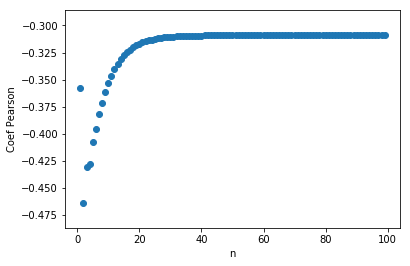

In [23]:
coef_p = []
n_list = []

for n in np.arange(1,100):
    coef_pearson = stats.pearsonr(D_list, matrix_P(G,n))
    coef_p.append(coef_pearson[0])
    n_list.append(n)

plt.scatter(n_list, coef_p)
plt.xlabel("n")
plt.ylabel("Coef Pearson")

    

## Exercício 6

#### A) euroroad.txt

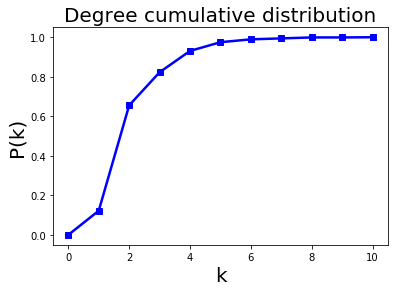

In [74]:
A = nx.read_edgelist("euroroad.txt", nodetype=int, data=(('weight',float),)) 
# Escolhendo o maior componente
A=sorted(nx.connected_component_subgraphs(A), key = len, reverse=True)
A=A[0]

ks, Pk = degree_distribution(A)
C = np.cumsum(Pk)

fig = plt.subplot(1,1,1)
plt.plot(ks, C, marker='s', linestyle='-', color="blue", linewidth=2.5)
plt.xlabel("k", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.title("Degree cumulative distribution", fontsize=20)
plt.show(True)

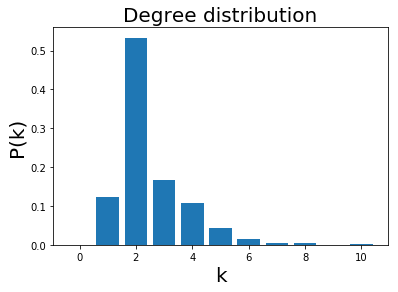

In [79]:
# Gráfico de Degree Distribution
fig = plt.subplot(1,1,1)
plt.bar(ks,Pk)
plt.xlabel("k", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.title("Degree distribution", fontsize=20)
plt.show(True)

#### B) facebook_combined.txt

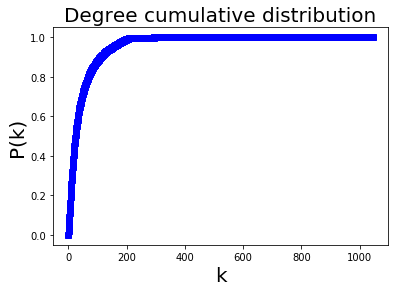

In [80]:
B = nx.read_edgelist("facebook_combined.txt", nodetype=int, data=(('weight',float),)) 
# Escolhendo o maior componente
B=sorted(nx.connected_component_subgraphs(B), key = len, reverse=True)
B=B[0]

ks_B, Pk = degree_distribution(B)
C = np.cumsum(Pk)

fig = plt.subplot(1,1,1)
plt.plot(ks_B, C, marker='s', linestyle='-', color="blue", linewidth=2.5)#'bo'
plt.xlabel("k", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.title("Degree cumulative distribution", fontsize=20)

plt.show(True)

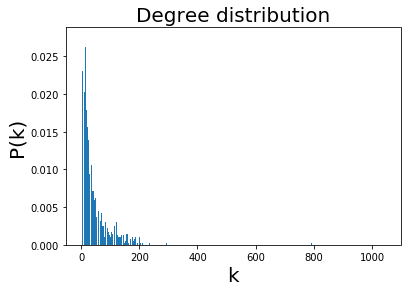

In [82]:
fig = plt.subplot(1,1,1)
plt.bar(ks_B,Pk)
plt.xlabel("k", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.title("Degree distribution", fontsize=20)
plt.show(True)

#### C) netscience.gml

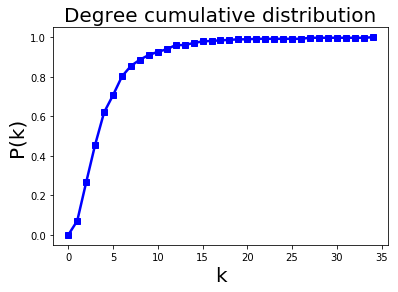

In [84]:
c = nx.read_gml("netscience.gml") 
# Escolhendo o maior componente
c = sorted(nx.connected_component_subgraphs(c), key = len, reverse=True)
c = c[0]

ks_C, Pk = degree_distribution(c)
C = np.cumsum(Pk)

fig = plt.subplot(1,1,1)
plt.plot(ks_C, C, marker='s', linestyle='-', color="blue", linewidth=2.5)#'bo'
plt.xlabel("k", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.title("Degree cumulative distribution", fontsize=20)
plt.show(True)

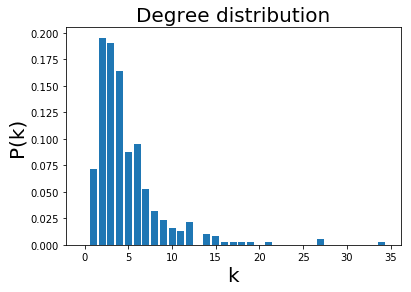

In [85]:
fig = plt.subplot(1,1,1)
plt.bar(ks_C,Pk)
plt.xlabel("k", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.title("Degree distribution", fontsize=20)
plt.show(True)

#### D) hamster.txt

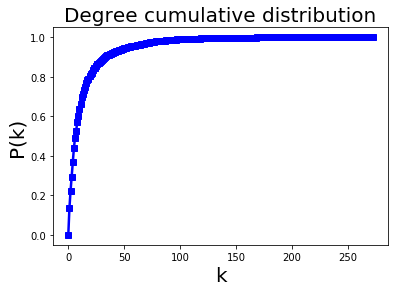

In [88]:
D = nx.read_edgelist("hamster.txt", nodetype=int, data=(('weight',float),)) 
# Escolhendo o maior componente
D=sorted(nx.connected_component_subgraphs(D), key = len, reverse=True)
D=D[0]

ks_D, Pk = degree_distribution(D)
C = np.cumsum(Pk)

fig = plt.subplot(1,1,1)
plt.plot(ks,C, marker='s', linestyle='-', color="blue", linewidth=2.5)
plt.xlabel("k", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.title("Degree cumulative distribution", fontsize=20)

plt.show(True)

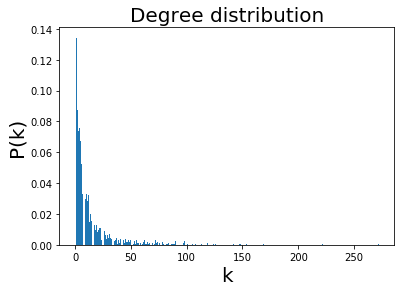

In [89]:
fig = plt.subplot(1,1,1)
plt.bar(ks_D,Pk)
plt.xlabel("k", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.title("Degree distribution", fontsize=20)
plt.show(True)

## Exercício 7

#### A) euroroad.txt

In [47]:
A = nx.read_edgelist("euroroad.txt", nodetype=int, data=(('weight',float),)) 
# Escolhendo o maior componente
A=sorted(nx.connected_component_subgraphs(A), key = len, reverse=True)
A=A[0]
A = nx.convert_node_labels_to_integers(A, first_label=0)
CC_A = (nx.transitivity(A)) 
print("Transitivity = ","%3.4f"%CC_A)
avc_A = nx.average_clustering(A)
print("Average clustering:", "%3.4f"%avc_A)

Transitivity =  0.0353
Average clustering: 0.0189


#### B) facebook_combined.txt

In [48]:
B = nx.read_edgelist("facebook_combined.txt", nodetype=int, data=(('weight',float),)) 
# Escolhendo o maior componente
B=sorted(nx.connected_component_subgraphs(B), key = len, reverse=True)
B=B[0]
B = nx.convert_node_labels_to_integers(B, first_label=0)
CC_B = (nx.transitivity(B)) 
print("Transitivity = ","%3.4f"%CC_B)
avc_B = nx.average_clustering(B)
print("Average clustering:", "%3.4f"%avc_B)

Transitivity =  0.5192
Average clustering: 0.6055


#### C) netscience.gml

In [49]:
c = nx.read_gml("netscience.gml") 
# Escolhendo o maior componente
c=sorted(nx.connected_component_subgraphs(c), key = len, reverse=True)
c=c[0]
c = nx.convert_node_labels_to_integers(c, first_label=0)
CC_C = (nx.transitivity(c)) 
print("Transitivity = ","%3.4f"%CC_C)
avc_C = nx.average_clustering(B)
print("Average clustering:", "%3.4f"%avc_C)

Transitivity =  0.4306
Average clustering: 0.6055


#### D) hamster.txt

In [50]:
D = nx.read_edgelist("hamster.txt", nodetype=int, data=(('weight',float),)) 
D=sorted(nx.connected_component_subgraphs(D), key = len, reverse=True)
D=D[0]
D = nx.read_edgelist("hamster.txt", nodetype=int, data=(('weight',float),))
D = nx.convert_node_labels_to_integers(D, first_label=0)
CC_D = (nx.transitivity(D)) 
print("Transitivity = ","%3.4f"%CC_D)
avc_D = nx.average_clustering(D)
print("Average clustering:", "%3.4f"%avc_D)

Transitivity =  0.0904
Average clustering: 0.1414


## EXERCÍCIO 8

In [51]:
def function(X):
    if nx.is_connected(X):
        d = nx.diameter(X)
        N = len(X)
        D = zeros(shape=(N,N)) # D is the matrix of distances
        vl = []
        for i in arange(0,N):
            for j in arange(i+1, N):
                if(i != j):
                    aux = nx.shortest_path(X,i,j)
                    dij = len(aux)-1
                    D[i][j] = dij
                    D[j][i] = dij
                    vl.append(dij)
        x = range(0,d+1)
        plt.hist(vl, bins = x, normed=True)
        plt.title("Distribution of the geodesic distances", fontsize=20)
        plt.ylabel("P(l)", fontsize=15)
        plt.xlabel("Shortest path length (l)", fontsize=15)
        plt.grid(True)
        plt.show(True)
    else:
        print("The graph has more than one connected component")
        

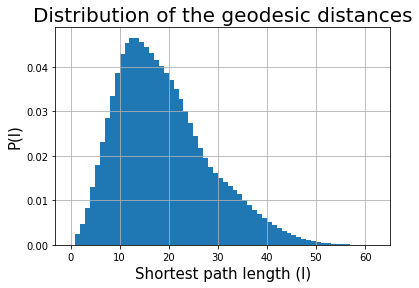

In [52]:
#A 
A = nx.read_edgelist("euroroad.txt", nodetype=int, data=(('weight',float),)) 
A=sorted(nx.connected_component_subgraphs(A), key = len, reverse=True)
A=A[0]
A1 = nx.convert_node_labels_to_integers(A)

function(A1)

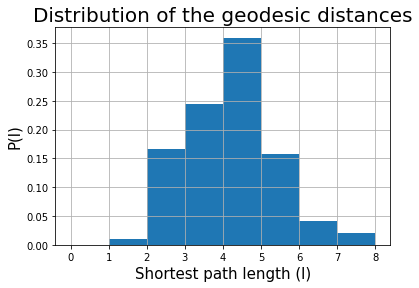

In [53]:
#B
B = nx.read_edgelist("facebook_combined.txt", nodetype=int, data=(('weight',float),))
B=sorted(nx.connected_component_subgraphs(B), key = len, reverse=True)
B=B[0]
B1 = nx.convert_node_labels_to_integers(B)

function(B1)

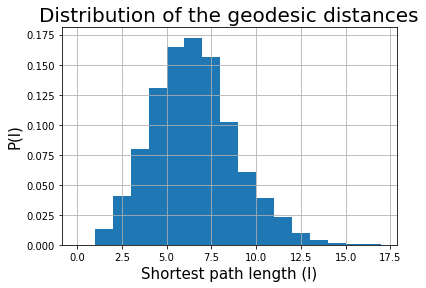

In [38]:
#C
c = nx.read_gml("netscience.gml") 
c=sorted(nx.connected_component_subgraphs(c), key = len, reverse=True)
c=c[0]
C1 = nx.convert_node_labels_to_integers(c)
 
function(C1)

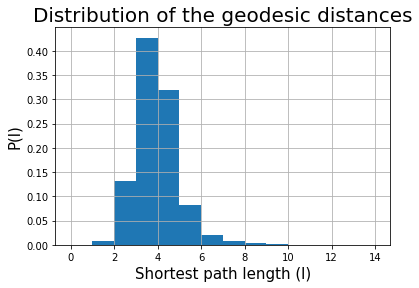

In [63]:
#D
D = nx.read_edgelist("hamster.txt", nodetype=int, data=(('weight',float),))
D=sorted(nx.connected_component_subgraphs(D), key = len, reverse=True)
D=D[0]
D1 = nx.convert_node_labels_to_integers(D)
  
function(D1)

## EXERCÍCIO 9

In [67]:
#Average degree
vk_A = dict(A.degree())
vk_A = list(vk_A.values())
vk_A = np.array(vk_A)
md_A = mean(vk_A)


#Average degree
vk_B = dict(B.degree())
vk_B = list(vk_B.values())
vk_B = np.array(vk_B)
md_B = mean(vk_B)

#Average degree
vk_C = dict(c.degree())
vk_C = list(vk_C.values())
vk_C = np.array(vk_C)
md_C = mean(vk_C)

#Average degree
vk_D = dict(D.degree())
vk_D = list(vk_D.values())
vk_D = np.array(vk_D)
md_D = mean(vk_D)

In [71]:
# Diametro A
if(nx.is_connected(A)):
    A1 = nx.convert_node_labels_to_integers(A, first_label=0)
    d_A = nx.diameter(A1)
else: 
    d_A = str("Não Conectados")
    
# Diametro B
if(nx.is_connected(B)):
    B1 = nx.convert_node_labels_to_integers(B, first_label=0)
    d_B = nx.diameter(B1)
else: 
    d_B = str("Não Conectados")
    
# Diametro C
if(nx.is_connected(c)):
    C1 = nx.convert_node_labels_to_integers(c, first_label=0)
    d_C = nx.diameter(C1)
else: 
    d_C = str("Não Conectados")
    
# Diametro D
if(nx.is_connected(D)):
    D1 = nx.convert_node_labels_to_integers(D, first_label=0)
    d_D = nx.diameter(D1)
else: 
    d_D = str("Não Conectados")

In [56]:
#Second moment of the degree distribution.
def momment_of_degree_distribution(G,m):
    k,Pk = degree_distribution(G)
    M = sum((k**m)*Pk)
    return M

k2_A = momment_of_degree_distribution(A,2)
print("Second moment of the degree distribution = ", k2_A)

k2_B = momment_of_degree_distribution(B,2)
print("Second moment of the degree distribution = ", k2_B)

k2_C = momment_of_degree_distribution(c,2)
print("Second moment of the degree distribution = ", k2_C)

k2_D = momment_of_degree_distribution(D,2)
print("Second moment of the degree distribution = ", k2_D)

Second moment of the degree distribution =  7.753609239653512
Second moment of the degree distribution =  4656.1440950730375
Second moment of the degree distribution =  38.68601583113457
Second moment of the degree distribution =  611.8148546824542


In [58]:
# Av. Shortest Path
l_A = nx.average_shortest_path_length(A)
l_B = nx.average_shortest_path_length(B)
l_C = nx.average_shortest_path_length(c)
l_D = nx.average_shortest_path_length(D)

In [72]:
from prettytable import PrettyTable
table = PrettyTable()
column_names = ["Measures","A","B","C","D"]

#1) 
table.add_column(column_names[0], ["Number of nodes", "Average degree","Second moment", "Average clustering coefficient","Transitivity","Av. Shortest Path","Diameter"])

#1)

table.add_column(column_names[1], [len(A), md_A, k2_A, avc_A, CC_A, l_A, d_A])

#2) 
table.add_column(column_names[2], [len(B), md_B, k2_B, avc_B, CC_B, l_B, d_B])

#3) 
table.add_column(column_names[3], [len(c), md_C, k2_C, avc_C, CC_C, l_C, d_C ])

#4) 
table.add_column(column_names[4], [len(D), md_D, k2_D, avc_D, CC_D, l_D, d_D ])


print(table)

+--------------------------------+----------------------+--------------------+--------------------+---------------------+
|            Medidas             |          A           |         B          |         C          |          D          |
+--------------------------------+----------------------+--------------------+--------------------+---------------------+
|        Number of nodes         |         1039         |        4039        |        379         |         1788        |
|         Average degree         |  2.512030798845043   | 43.69101262688784  | 4.823218997361478  |  13.955257270693512 |
|         Second moment          |  7.753609239653512   | 4656.1440950730375 | 38.68601583113457  |  611.8148546824542  |
| Average clustering coefficient | 0.018905541042210917 | 0.6055467186200876 | 0.6055467186200876 |  0.1413864121675117 |
|          transitivity          | 0.03525523319867793  | 0.5191742775433075 | 0.4305750350631136 | 0.09040338801314042 |
|       Av. Shortest Pat

# Exercício 10

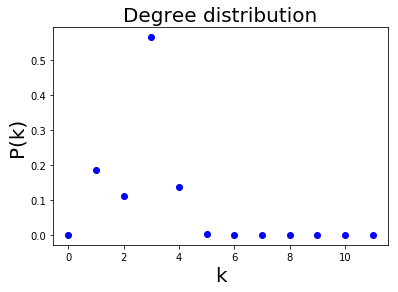

In [53]:
# NEW YORK 
NY = nx.read_edgelist("newyork_edge_list.txt", nodetype=int, data=(('weight',float),))
NY = NY.to_undirected()
NY = sorted(nx.connected_component_subgraphs(NY), key = len, reverse=True)
NY = NY[0]
ks, Pk = degree_distribution(NY)

fig = plt.subplot(1,1,1)
plt.plot(ks,Pk,'bo')
plt.xlabel("k", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.title("Degree distribution", fontsize=20)
plt.show(True)

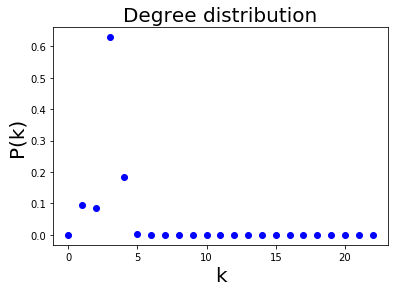

In [59]:
# TOKIO
TO = nx.read_edgelist("tokyo_edge_list.txt", nodetype=int, data=(('weight',float),))
TO = TO.to_undirected()
TO = sorted(nx.connected_component_subgraphs(TO), key = len, reverse=True)
TO = TO[0]
ks, Pk = degree_distribution(TO)

fig = plt.subplot(1,1,1)
plt.plot(ks,Pk,'bo')
plt.xlabel("k", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.title("Degree distribution", fontsize=20)
plt.show(True)

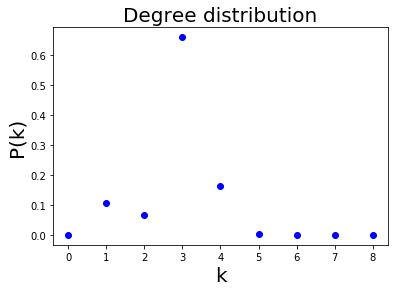

In [63]:
# SÃO PAULO
SP = nx.read_edgelist("saopaulo_edge_list.txt", nodetype=int, data=(('weight',float),))
SP = SP.to_undirected()
SP = sorted(nx.connected_component_subgraphs(SP), key = len, reverse=True)
SP = SP[0]
ks, Pk = degree_distribution(SP)

fig = plt.subplot(1,1,1)
plt.plot(ks,Pk,'bo')
plt.xlabel("k", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.title("Degree distribution", fontsize=20)
plt.show(True)

In [69]:
# A) 
k1_ny = momment_of_degree_distribution(NY, 1)
k2_ny = momment_of_degree_distribution(NY,2)
comp_measure = (k2_ny)/(k1_ny)
print("Complexity Measure NY = ",comp_measure )

k1_to = momment_of_degree_distribution(TO, 1)
k2_to = momment_of_degree_distribution(TO,2)
comp_measure_to = (k2_to)/(k1_to)
print("Complexity Measure TO = ",comp_measure_to )

k1_sp = momment_of_degree_distribution(SP, 1)
k2_sp = momment_of_degree_distribution(SP,2)
comp_measure_sp = (k2_sp)/(k1_sp)
print("Complexity Measure SP = ",comp_measure_sp )



Complexity Measure NY =  2.997367317511824
Complexity Measure TO =  3.1608480632636797
Complexity Measure SP =  3.1264612666909133


In [71]:
# B) 
l_ny = len(NY)
print("Número de nós NY = ", l_ny)

l_to = len(TO)
print("Número de nós TO = ", l_to)

l_sp = len(SP)
print("Número de nós SP = ", l_sp)


Número de nós NY =  334930
Número de nós TO =  345185
Número de nós SP =  212540


In [73]:
#C) 
ny = nx.convert_node_labels_to_integers(NY, first_label=0)
avc_ny = nx.average_clustering(ny)
print("Average clustering NY:", "%3.4f"%avc_ny)

to = nx.convert_node_labels_to_integers(TO, first_label=0)
avc_to = nx.average_clustering(to)
print("Average clustering TO:", "%3.4f"%avc_to)

SP = nx.convert_node_labels_to_integers(SP, first_label=0)
avc_sp = nx.average_clustering(SP)
print("Average clustering SP:", "%3.4f"%avc_sp)

Average clustering NY: 0.0422
Average clustering TO: 0.0305
Average clustering SP: 0.0459


Pelo medida de complexidade podemos dizer que entre essas cidades Tokio é a mais complexa. Mas ao mesmo tempo possui um baixo valor médio de clustering, consequentemente é a cidade com mais conexões, ou seja, apesar de ser a mais complexa seria a mais fácil de se locomover.  

Obsevação: O calculo de "Average shortest path length" não foi possível pois as redes são muito grandes, mesmo se considerarmos somente o maior compenente. Não foi possível rodar nos computadores que tínhamos a disposição. Em vez disso olhamos para o números de nós. 